In [1]:
!pip install spacy==2.2.3
!python3 -m spacy download pt

     |████████████████████████████████| 21.2 MB 11.6 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [2]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np
import spacy
spacy.__version__

'2.2.3'

In [3]:
base_dados = pd.read_csv('/content/base_treinamento.txt', encoding = 'utf-8')

In [4]:
base_dados.shape

(196, 2)

In [5]:
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [6]:
base_dados.tail()

,texto,emocao
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


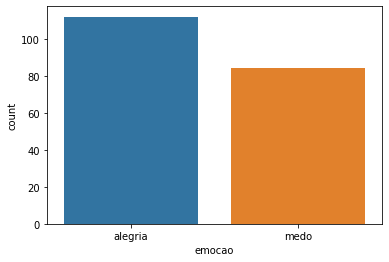

In [7]:
sns.countplot(base_dados['emocao'], label = 'Contagem');

Pré-processamento dos textos

In [8]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [10]:
print(stop_words)

{'dezoito', 'podia', 'daquele', 'quieto', 'das', 'sobre', 'vais', 'foram', 'quais', 'atrás', 'devem', 'meses', 'área', 'onze', 'nesse', 'estive', 'uns', 'quinze', 'da', 'sim', 'essas', 'sabe', 'número', 'tempo', 'embora', 'dizem', 'teve', 'longe', 'tentar', 'novas', 'ademais', 'quanto', 'aquele', 'cá', 'contra', 'ser', 'em', 'estiveste', 'quinto', 'todos', 'se', 'questão', 'põe', 'vossa', 'outras', 'tendes', 'lhe', 'tivemos', 'desta', 'dá', 'uma', 'fim', 'pelas', 'pouco', 'pontos', 'posso', 'maiorias', 'no', 'naquele', 'sois', 'forma', 'como', 'nossos', 'já', 'também', 'umas', 'não', 'iniciar', 'naquela', 'nós', 'grande', 'sou', 'és', 'nossa', 'números', 'meus', 'sétima', 'quê', 'poderá', 'quinta', 'ainda', 'relação', 'lugar', 'ambas', 'inicio', 'nova', 'ali', 'este', 'vinte', 'comprida', 'treze', 'certamente', 'era', 'máximo', 'tem', 'porquanto', 'me', 'agora', 'demais', 'parte', 'do', 'tarde', 'sem', 'um', 'mal', 'desde', 'comprido', 'eles', 'ponto', 'estará', 'vários', 'na', 'sempre

In [11]:
len(stop_words)

413

In [12]:
pln = spacy.load('pt')

In [13]:
pln

In [14]:
def preprocessamento(texto):
  texto = texto.lower()
  documento = pln(texto)
  
  lista = []
  for token in documento:
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [15]:
teste = preprocessamento('Estou aPrendendo 1 10 23 processamento de linguagem natural, Curso em Curitiba')
teste

'aprender processamento linguagem natural cursar curitiba'

Pré-processamento da base de dados

In [16]:
base_dados.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [17]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)

In [18]:
base_dados.head(10)

,texto,emocao
0,trabalhar agradável,alegria
1,gostar ficar o aconchegar,alegria
2,o adesão o o cursar hoje,alegria
3,admirar,alegria
4,adorar comer,alegria
5,adorar cabelar maciar,alegria
6,adorar o cor olho,alegria
7,somar amável o outro,alegria
8,sentir umar afeição,alegria
9,querer agradar filho,alegria


In [19]:
exemplo_base_dados = [["este trabalho é agradável", {"ALEGRIA": True, "MEDO": False}],
                      ["este lugar continua assustador", {"ALEGRIA": False, "MEDO": True}]]

In [20]:
type(exemplo_base_dados)

list

In [21]:
exemplo_base_dados[0]

['este trabalho é agradável', {'ALEGRIA': True, 'MEDO': False}]

In [22]:
exemplo_base_dados[0][0]

'este trabalho é agradável'

In [23]:
exemplo_base_dados[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [24]:
type(exemplo_base_dados[0][1])

dict

In [25]:
base_dados_final = []
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  if emocao == 'alegria':
    dic = ({'ALEGRIA': True, 'MEDO': False})
  elif emocao == 'medo':
    dic = ({'ALEGRIA': False, 'MEDO': True})

  base_dados_final.append([texto, dic.copy()])

In [26]:
len(base_dados_final)

196

In [27]:
base_dados_final[0]

['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}]

In [28]:
base_dados_final[0][0]

'trabalhar agradável'

In [29]:
base_dados_final[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [30]:
type(base_dados_final[0][1])

dict

In [31]:
base_dados_final

[['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gostar ficar o aconchegar', {'ALEGRIA': True, 'MEDO': False}],
 ['o adesão o o cursar hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar comer', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelar maciar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar o cor olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somar amável o outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir umar afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['o dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixonar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir hoje'

Criação do classificador

In [32]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe("textcat")
categorias.add_label("ALEGRIA")
categorias.add_label("MEDO")
modelo.add_pipe(categorias)
historico = []

In [33]:
modelo.begin_training()
for epoca in range(1000):
  random.shuffle(base_dados_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_final, 30):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    modelo.update(textos, annotations, losses=losses)
  if epoca % 100 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 0.007515753852203488}
{'textcat': 2.5282015059246987e-07}
{'textcat': 7.179760963538229e-08}
{'textcat': 4.065465075697716e-08}
{'textcat': 1.875675947893285e-08}
{'textcat': 1.3584435021307684e-08}
{'textcat': 1.1377875919205138e-08}
{'textcat': 6.3950593154338264e-09}
{'textcat': 5.785471657304697e-09}
{'textcat': 5.478544895520798e-09}


In [34]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [35]:
historico_loss = np.array(historico_loss)
historico_loss

array([7.51575385e-03, 2.52820151e-07, 7.17976096e-08, 4.06546508e-08,
       1.87567595e-08, 1.35844350e-08, 1.13778759e-08, 6.39505932e-09,
       5.78547166e-09, 5.47854490e-09])

Text(0, 0.5, 'Erro')

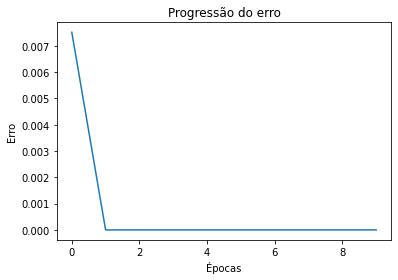

In [36]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [37]:
modelo.to_disk("modelo")

Testes com uma frase

In [38]:
modelo_carregado = spacy.load("modelo")
modelo_carregado

In [39]:
texto_positivo = 'eu adoro cor dos seus olhos'

In [40]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'adorar cor olho'

In [41]:
previsao = modelo_carregado(texto_positivo)
previsao

adorar cor olho

In [42]:
previsao.cats

{'ALEGRIA': 0.9995306730270386, 'MEDO': 0.00043457146966829896}

In [43]:
texto_negativo = 'estou com medo dele'
previsao = modelo_carregado(preprocessamento(texto_negativo))
previsao.cats

{'ALEGRIA': 0.09680327028036118, 'MEDO': 0.9418526887893677}

Avaliação do modelo

In [44]:
previsoes = []
for texto in base_dados['texto']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [45]:
previsoes

[{'ALEGRIA': 0.9992896318435669, 'MEDO': 0.0006358448299579322},
 {'ALEGRIA': 0.9996750354766846, 'MEDO': 0.0005421839305199683},
 {'ALEGRIA': 0.9998524188995361, 'MEDO': 6.210851279320195e-05},
 {'ALEGRIA': 0.9996119141578674, 'MEDO': 0.0005596324917860329},
 {'ALEGRIA': 0.9998856782913208, 'MEDO': 0.00015080146840773523},
 {'ALEGRIA': 0.9995193481445312, 'MEDO': 0.0004023944784421474},
 {'ALEGRIA': 0.9996328353881836, 'MEDO': 0.00031612420571036637},
 {'ALEGRIA': 0.9997991919517517, 'MEDO': 0.00042481208220124245},
 {'ALEGRIA': 0.9994255304336548, 'MEDO': 0.00048728016554377973},
 {'ALEGRIA': 0.999527096748352, 'MEDO': 0.00048097551916725934},
 {'ALEGRIA': 0.99988853931427, 'MEDO': 0.00010574874613666907},
 {'ALEGRIA': 0.9995642304420471, 'MEDO': 0.0003843790909741074},
 {'ALEGRIA': 0.999789297580719, 'MEDO': 0.00019867878290824592},
 {'ALEGRIA': 0.9998668432235718, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9997106194496155, 'MEDO': 0.0004355043056420982},
 {'ALEGRIA': 0.9997474

In [46]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [47]:
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [48]:
respostas_reais = base_dados['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

1.0

In [50]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[112,   0],
       [  0,  84]])

Avaliação na base de teste

In [51]:
base_dados_teste = pd.read_csv('/content/base_teste.txt', encoding = 'utf-8')

In [52]:
base_dados_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [53]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento)

In [54]:
base_dados_teste.head()

,texto,emocao
0,precisar pagar o ingressar,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar o suar,alegria
3,afortunar,alegria
4,benéfico parir medir,alegria


In [55]:
previsoes = []
for texto in base_dados_teste['texto']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [56]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [57]:
respostas_reais = base_dados_teste['emocao'].values

In [58]:
accuracy_score(respostas_reais, previsoes_final)

0.5476190476190477

In [59]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[30, 18],
       [20, 16]])